In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict

## 1. Импорт и  первичный анализ данных

In [182]:
data = pd.read_csv('data/winequality-red.zip', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [184]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Проанализируйте распределения переменных и корреляцию с таргетом.

[Text(0, 0.5, 'alcohol')]

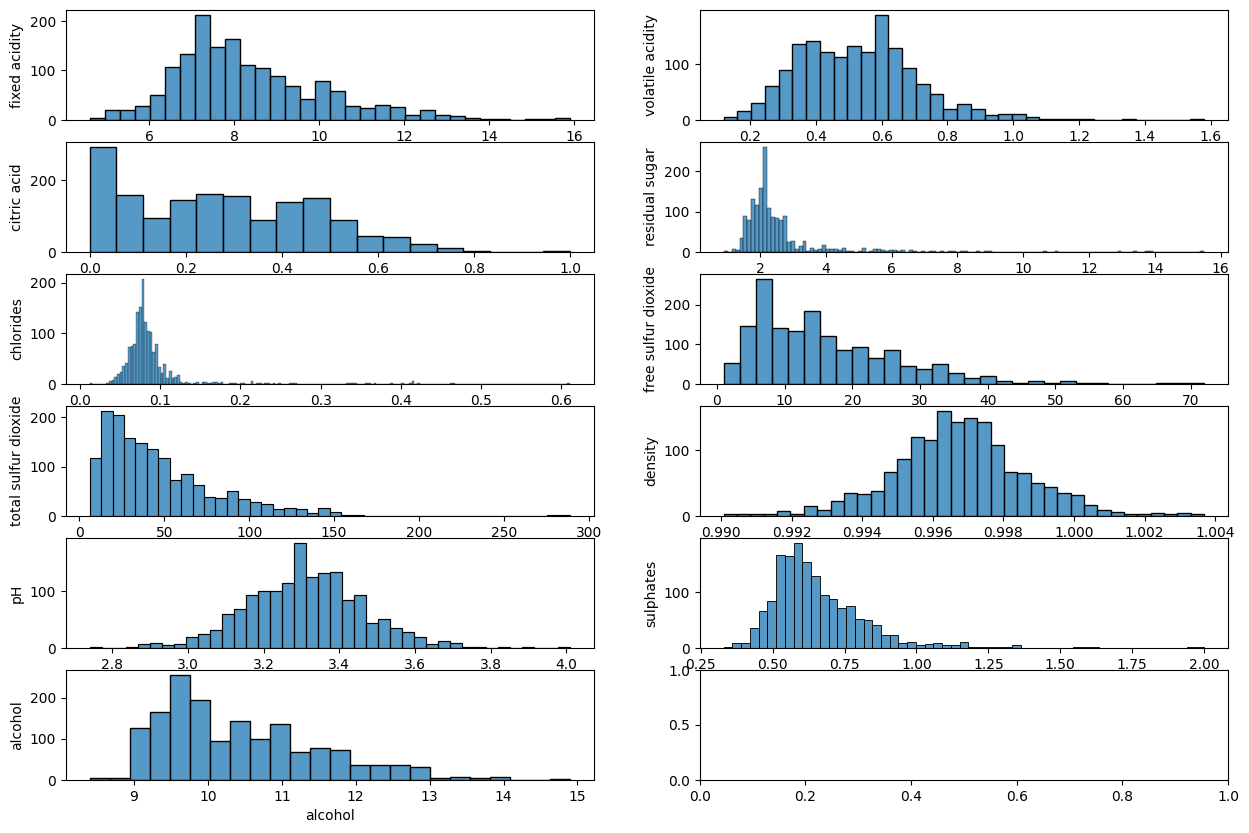

In [185]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 10))

sns.histplot(data=data['fixed acidity'], ax=axes[0][0])
axes[0][0].set(ylabel="fixed acidity")

sns.histplot(data=data['volatile acidity'], ax=axes[0][1])
axes[0][1].set(ylabel="volatile acidity")

sns.histplot(data=data['citric acid'], ax=axes[1][0])
axes[1][0].set(ylabel="citric acid")

sns.histplot(data=data['residual sugar'], ax=axes[1][1])
axes[1][1].set(ylabel="residual sugar")

sns.histplot(data=data['chlorides'], ax=axes[2][0])
axes[2][0].set(ylabel="chlorides")

sns.histplot(data=data['free sulfur dioxide'], ax=axes[2][1])
axes[2][1].set(ylabel="free sulfur dioxide")

sns.histplot(data=data['total sulfur dioxide'], ax=axes[3][0])
axes[3][0].set(ylabel="total sulfur dioxide")

sns.histplot(data=data['density'], ax=axes[3][1])
axes[3][1].set(ylabel="density")

sns.histplot(data=data['pH'], ax=axes[4][0])
axes[4][0].set(ylabel="pH")

sns.histplot(data=data['sulphates'], ax=axes[4][1])
axes[4][1].set(ylabel="sulphates")

sns.histplot(data=data['alcohol'], ax=axes[5][0])
axes[5][0].set(ylabel="alcohol")

Параметры (за исключением параметра citric acid) имеют нормально еили логнормальное распределние.

[Text(0, 0.5, 'quality сorrelation')]

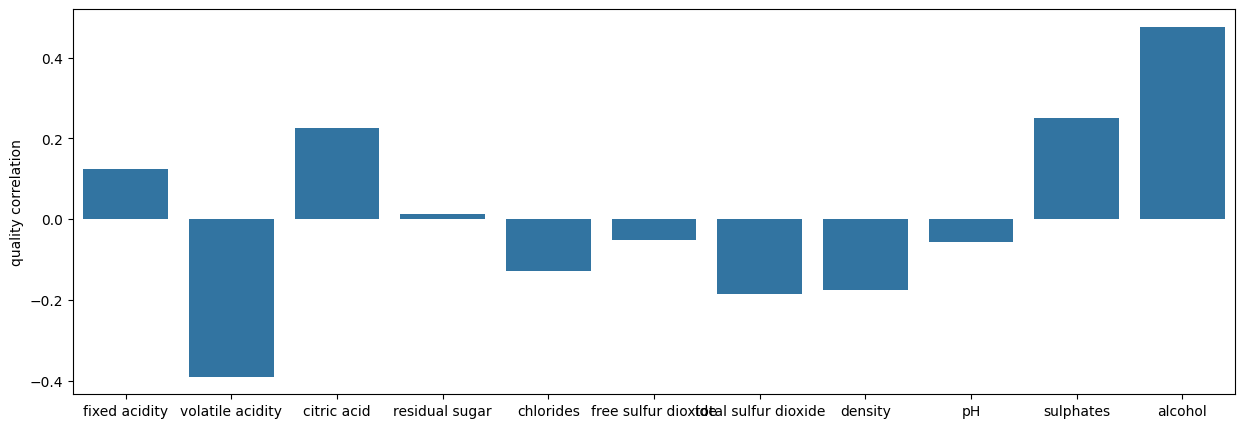

In [186]:
fig, axes = plt.subplots(nrows=1, figsize=(15, 5))

sns.barplot(data.corr(numeric_only=True)['quality'][:-1])
axes.set(ylabel="quality сorrelation")

Самую сильную корреляцию с целевой переменной имеют параметры volatile acid и sulphates.

## 3. Сделайте целевую переменную категориальной ('bad wine': quality < 6.5 и 'good wine': quality > 6.5).

In [187]:
data['target'] = data['quality'].apply(lambda x: 'bad wine' if x<6.5 else 'good wine').astype('category')
data['target'].unique()

['bad wine', 'good wine']
Categories (2, object): ['bad wine', 'good wine']

## 4. Закодируйте целевую переменную.

In [188]:
data['target'] = data['target'].apply(lambda x: 0 if x=='bad wine' else 1).astype('int')
data['target'].sum()

217

## 5. Используйте StandardScaler() для преобразования признаков

In [189]:
data.drop(['target','quality'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [190]:
s_scaler = StandardScaler()

# кодируем исходный датасет
X = pd.DataFrame(s_scaler.fit_transform(data.drop(['target','quality'], axis=1)), columns=data.drop(['target','quality'], axis=1).columns)


y = data['target']

X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


## 6. Настройте гиперпараметры модели SVC: C, gamma и kernel из ['linear', 'poly', 'rbf', 'sigmoid'].

In [191]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

scv_cl = SVC(random_state=42)

In [192]:
reg_grid = GridSearchCV(scv_cl, param_grid=param_grid, cv=3, scoring='accuracy')


model_grid = reg_grid.fit(X, y)

In [197]:
print('best parametrs: ',reg_grid.best_params_)
print('accuracy:', reg_grid.best_score_)

best parametrs:  {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy: 0.8761726078799249


## 7. Используйте метрику accuracy. Также можно смотреть результаты confusion matrix.

In [194]:
y_pred = cross_val_predict(reg_grid.best_estimator_, X, y, cv=5)

print('accuracy score: ', accuracy_score(y_pred, y))

accuracy score:  0.8642901813633521


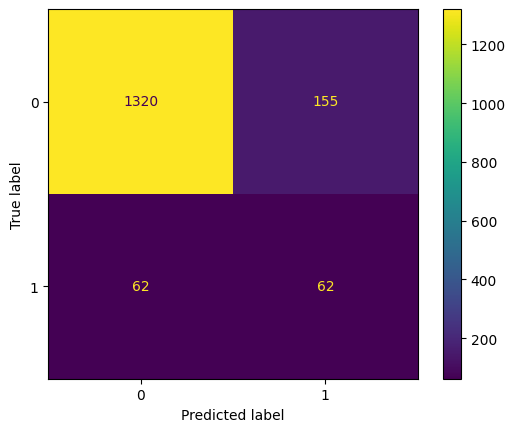

In [195]:
svc_c_m = confusion_matrix(y_pred, y)

disp = ConfusionMatrixDisplay(confusion_matrix=svc_c_m,
                              display_labels=reg_grid.best_estimator_.classes_)
disp.plot()

## 8. Обучите модель с наилучшими параметрами и оцените score на кросс-валидации. 

In [196]:
cv = cross_val_score(reg_grid.best_estimator_, X, y, cv=5, scoring='accuracy')
print(cv)
print('accuracy score on cross validation: ', cv.mean())

[0.878125   0.84375    0.8875     0.8375     0.87460815]
accuracy score on cross validation:  0.8642966300940438
